In [ ]:
output_string = """
1140
forward 0 4.5
rotate 0 3.14159
forward 2 5
forward 3 -5
sell 1
buy 1
OK
"""
#前进，机器人ID，速度米/秒|旋转弧度/秒|

In [ ]:
from frame import Map, parse_input
input_string = """
1144 199346
9
1 43.75 49.25 0 12 1
2 45.75 49.25 0 0 1
3 47.75 49.25 0 0 1
4 43.75 47.25 -1 0 0
5 45.75 47.25 168 0 0
6 47.75 47.25 -1 0 0
7 44.75 45.25 -1 0 0
8 46.75 45.25 -1 0 0
9 46.25 42.25 -1 0 0
5 3 0.9657950401 1 0 0 0 -0.3755806088 47.5760498 47.40252686
-1 0 0 0 0 0 0 -0.006108176429 43.75140762 48.23157501
-1 0 0 0 0 0 0 0 3.25 2.25
-1 0 0 0 0 0 0 0 45.75 1.75
OK
"""
## 最后的 4 行机器人数据：|所在工作台ID|携带物品类型|时间价值系数|碰撞价值系数|角速度|线速度|朝向|坐标
map_obj = parse_input(input_string)


In [70]:
from matplotlib import pyplot as plt
import numpy as np
from frame import Map, parse_input

map_txt_file_path = '/mnt/e/2023huawei/LinuxRelease/LinuxRelease/maps/1.txt'
def read_map():
    # 打开文件并读取每一行，并对每一行进行映射转换
    with open(map_txt_file_path, "r") as f:
        ori_matrix = np.array([list(line.strip()) for line in f])
    search_chars = ['A', '1', '2', '3', '4', '5', '6', '7','8']
    char_to_coord = {}
    # 查找符合条件的元素的下标，并将下标和对应的值储存在字典中
    for char in search_chars:
        char_to_coord[char] = {}
        indices = np.where(ori_matrix == char)
        for i in range(len(indices[0])):
            char_to_coord[char][i] = (indices[1][i]*0.5+0.25, 50-(indices[0][i]*0.5+0.25))
    return char_to_coord

def w_v_fun(delta_dir):
    k_w = 1 # 可以调节的参数
    w = k_w * delta_dir
    k_v = 1
    v = k_v*(1-(np.absolute(w)/np.pi))*6
    return w, v
    
if __name__ == '__main__':
    all_coord = read_map()
    print(all_coord)
    # points = np.array(list(all_coord['1'].values()))
    points = [[10, 10], [20,15]]
    print(points)
    # fit_curve(points[:3])
    cur_dir = np.pi # 每帧更新
    tar_cur_dir = [points[1][0]-points[0][0],points[1][1]-points[0][1]]
    tar_dir = np.arctan2(tar_cur_dir[1],tar_cur_dir[0]) # 每帧更新
    delta_dir = tar_dir - cur_dir
    if np.absolute(delta_dir) > np.pi : delta_dir += 2*np.pi # w的范围是[-pi,pi]
    print('cur_dir=',cur_dir,'tar_dir=',tar_dir,'delta_dir=',delta_dir)
    w, v = w_v_fun(delta_dir = delta_dir)
    
    
    
    
    # u = np.array([u1, u2])
    # v = np.array([v1, v2])

    # dot_product = np.dot(points[0]-points[1])
    # norm_u = np.linalg.norm(points[0]-points[1])
    # norm_v = np.linalg.norm(np.array([1,0]))
    # angle = np.arccos(dot_product / (norm_u * norm_v))
    # print(angle)

{'A': {0: (24.75, 38.75), 1: (24.75, 36.75), 2: (24.75, 34.25), 3: (24.75, 29.25)}, '1': {0: (1.25, 48.75), 1: (48.75, 48.75), 2: (24.75, 31.75), 3: (24.75, 18.75), 4: (1.25, 1.25), 5: (48.75, 1.25)}, '2': {0: (3.25, 48.75), 1: (22.25, 48.75), 2: (9.25, 34.25), 3: (9.25, 16.25), 4: (3.25, 1.25), 5: (22.25, 1.25)}, '3': {0: (27.75, 48.75), 1: (46.75, 48.75), 2: (40.75, 34.25), 3: (40.75, 16.25), 4: (27.75, 1.25), 5: (46.75, 1.25)}, '4': {0: (5.25, 48.75), 1: (36.75, 34.25), 2: (36.75, 16.25), 3: (5.25, 1.25)}, '5': {0: (44.75, 48.75), 1: (13.25, 34.25), 2: (13.25, 16.25), 3: (44.75, 1.25)}, '6': {0: (24.75, 39.75), 1: (24.75, 10.75)}, '7': {0: (17.25, 25.25), 1: (32.25, 25.25)}, '8': {0: (24.75, 25.25)}}
[[10, 10], [20, 15]]
cur_dir= 3.141592653589793 tar_dir= 0.4636476090008061 delta_dir= -2.677945044588987


In [52]:
u = np.array([10, 10])
angle = np.arctan2(u[1], u[0])
print(angle)

0.7853981633974483


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 三个点的坐标
p1 = np.array([1, 2])
p2 = np.array([4, 5])
p3 = np.array([7, 3])

# 生成Bezier曲线的参数t，取值范围为0到1
t = np.linspace(0, 1, 100)

# 二次Bezier曲线的公式
curve = (1-t)**2*p1 + 2*t*(1-t)*p2 + t**2*p3

# 绘制曲线和点
plt.plot(curve[:,0], curve[:,1], label='Curve')
plt.scatter([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]], label='Points')

# 添加标签和标题
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bezier Curve')
plt.savefig('/home/hanson/codecraft2022/route_test.jpg')
# 显示图形
plt.legend()
plt.show()


ValueError: operands could not be broadcast together with shapes (100,) (2,) 

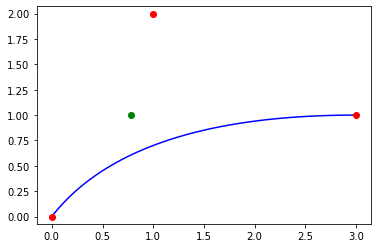

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic_bezier(P0, C, P1):
    def f(t):
        return (1 - t) ** 2 * P0 + 2 * (1 - t) * t * C + t ** 2 * P1
    return f

# 定义三个点
P0 = np.array([0, 0], dtype=float)
P1 = np.array([1, 2], dtype=float)
P2 = np.array([3, 1], dtype=float)

# 计算二次Bezier曲线的控制点
C = 4 / 9 * P1 + 1 / 9 * (P0 + P2)

# 构建二次Bezier曲线
f = quadratic_bezier(P0, C, P2)

# 计算二次Bezier曲线上的点
n = 100
t = np.linspace(0, 1, n)
B = np.zeros((n, 2))
for i in range(n):
    B[i] = f(t[i])

# 画出二次Bezier曲线和控制点
plt.plot(B[:, 0], B[:, 1], 'b')
plt.plot(P0[0], P0[1], 'ro')
plt.plot(P1[0], P1[1], 'ro')
plt.plot(P2[0], P2[1], 'ro')
plt.plot(C[0], C[1], 'go')
plt.axis('equal')
plt.savefig('/home/hanson/codecraft2022/route_test.jpg')
plt.show()


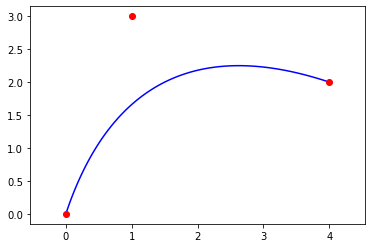

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic_bezier(p0, p1, p2, n):
    t = np.linspace(0, 1, n)
    B = np.zeros((n, 2))
    for i in range(n):
        B[i] = (1-t[i])**2 * p0 + 2*t[i]*(1-t[i]) * p1 + t[i]**2 * p2
    return B

# 定义控制点
p0 = np.array([0, 0])
p1 = np.array([1, 3])
p2 = np.array([4, 2])

# 计算贝塞尔曲线上的点
n = 100
B = quadratic_bezier(p0, p1, p2, n)

# 画出贝塞尔曲线
plt.plot(B[:, 0], B[:, 1], 'b')
plt.plot(p0[0], p0[1], 'ro')
plt.plot(p1[0], p1[1], 'ro')
plt.plot(p2[0], p2[1], 'ro')
plt.axis('equal')
plt.savefig('/home/hanson/codecraft2022/route_test.jpg')
plt.show()



In [20]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

# 定义三个控制点的坐标
p1 = np.array([0, 0])
p2 = np.array([1, 2])
p3 = np.array([3, 1])
p1 = np.tile(p1, (50, 1))
p2 = np.tile(p1, (50, 1))
p3 = np.tile(p1, (50, 1))

# 计算两条样条曲线上的点
t1 = np.linspace(0, 1, 50)
t2 = np.linspace(0, 1, 50)
P1 = (1 - t1) ** 2 * np.tile(p1, (50, 1)) + 2 * (1 - t1) * t1 * np.tile(p2, (50, 1))
P2 = (1 - t2) ** 2 * np.tile(p3, (50, 1)) + 2 * t2 * (1 - t2) * np.tile(p2, (50, 1))

# 将两条曲线拼接起来
P = np.concatenate((P1, P2))

# 绘制图像
plt.plot(P[:,0], P[:,1], 'b-', linewidth=2)
plt.plot([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]], 'ro')

plt.savefig('/home/hanson/codecraft2022/route_test.jpg')
plt.show()



ValueError: operands could not be broadcast together with shapes (50,) (2500,2) 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 定义三个控制点的坐标
p1 = np.array([0, 0])
p2 = np.array([1, 2])
p3 = np.array([3, 1])

# 定义节点序列，曲线阶数和生成样本数
t = np.array([0, 0, 0, 1, 2, 3, 3, 3])
k = 3
n = 100

# 将控制点按照曲线阶数扩展为新的控制点数组
c = np.zeros((len(t)-k-1, k+1, 2))
for i in range(len(t)-k-1):
    c[i,:] = [p1,p2,p3][i:i+k+1]

# 定义插值函数
def cubic_interpolation(t, c, x):
    n = len(t) - k - 1
    y = np.zeros_like(x)
    for i in range(n):
        indices = np.arange(i, i+k+1)
        w = np.ones_like(indices)
        for j in range(1, k+1):
            mask = indices[:-j] < i+j
            w[:-j] = w[:-j] * (t[indices[:-j]+j] - x) / (t[indices[:-j]+j] - t[indices[:-j]])
            w[j:] = w[j:] * (x - t[indices[j:]]) / (t[indices[j:]+1] - t[indices[j:]-j+1])
        y += np.sum(w[:, np.newaxis] * c[i:i+k+1], axis=0)
    return y

# 生成样本点
x = np.linspace(t[k], t[n-k], n)
y = cubic_interpolation(t, c, x)

# 绘制图像
plt.plot(y[:,0], y[:,1], 'b-', linewidth=2)
plt.plot(c[:, :, 0].flatten(), c[:, :, 1].flatten(), 'ro')
plt.show()



ValueError: could not broadcast input array from shape (3,2) into shape (4,2)

In [51]:
import numpy as np

# 定义机器人的起始坐标、目标坐标和下一个目标坐标
start_point = np.array([24.75, 0])
goal_point = np.array([10, 10])
next_goal_point = np.array([20, 0])

# 定义路径上的采样点数量
num_points = 50

# 构造路径上的采样点
x = np.linspace(start_point[0], next_goal_point[0], num_points)
y = np.interp(x, [start_point[0], goal_point[0], next_goal_point[0]],
              [start_point[1], goal_point[1], next_goal_point[1]])

# 打印生成的路径
path = np.column_stack((x, y))
print(path)


[[ 0.          0.        ]
 [ 0.40816327  0.40816327]
 [ 0.81632653  0.81632653]
 [ 1.2244898   1.2244898 ]
 [ 1.63265306  1.63265306]
 [ 2.04081633  2.04081633]
 [ 2.44897959  2.44897959]
 [ 2.85714286  2.85714286]
 [ 3.26530612  3.26530612]
 [ 3.67346939  3.67346939]
 [ 4.08163265  4.08163265]
 [ 4.48979592  4.48979592]
 [ 4.89795918  4.89795918]
 [ 5.30612245  5.30612245]
 [ 5.71428571  5.71428571]
 [ 6.12244898  6.12244898]
 [ 6.53061224  6.53061224]
 [ 6.93877551  6.93877551]
 [ 7.34693878  7.34693878]
 [ 7.75510204  7.75510204]
 [ 8.16326531  8.16326531]
 [ 8.57142857  8.57142857]
 [ 8.97959184  8.97959184]
 [ 9.3877551   9.3877551 ]
 [ 9.79591837  9.79591837]
 [10.20408163  9.79591837]
 [10.6122449   9.3877551 ]
 [11.02040816  8.97959184]
 [11.42857143  8.57142857]
 [11.83673469  8.16326531]
 [12.24489796  7.75510204]
 [12.65306122  7.34693878]
 [13.06122449  6.93877551]
 [13.46938776  6.53061224]
 [13.87755102  6.12244898]
 [14.28571429  5.71428571]
 [14.69387755  5.30612245]
 